In [2]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pylab import rcParams

spark = SparkSession.builder.appName("Sparkpro1").getOrCreate()
#student_personal_data
df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("C:/Users/2094072/Downloads/student_personal_data.csv")
spark.sparkContext.setLogLevel("ERROR")
df.printSchema()
df.createOrReplaceTempView("spd")


#student_Marks_data
df1 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("C:/Users/2094072/Downloads/student_Marks_data.csv")
spark.sparkContext.setLogLevel("ERROR")
df1.printSchema()
df1.createOrReplaceTempView("smd")


#student_Department_Information
df3 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("C:/Users/2094072/Downloads/Department_Information.csv")
spark.sparkContext.setLogLevel("ERROR")
df3.printSchema()
df3.createOrReplaceTempView("dip")


C:\Users\2094072\AppData\Local\Continuum\anaconda2\lib\site-packages\pyspark\context.py:227: DeprecationWarning: Support for Python 2 and Python 3 prior to version 3.6 is deprecated as of Spark 3.0. See also the plan for dropping Python 2 support at https://spark.apache.org/news/plan-for-dropping-python-2-support.html.
  DeprecationWarning)


root
 |-- roll_no: integer (nullable = true)
 |-- dip_code: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- phone_no: long (nullable = true)
 |-- gmail: string (nullable = true)
 |-- address: string (nullable = true)

root
 |-- roll_no: integer (nullable = true)
 |-- dip_code: integer (nullable = true)
 |-- Ssc: double (nullable = true)
 |-- Hsc: double (nullable = true)
 |-- Gre: double (nullable = true)
 |-- Staus: string (nullable = true)
 |-- Year: integer (nullable = true)

root
 |-- dip_code: integer (nullable = true)
 |-- dip_name: string (nullable = true)
 |-- Capacity: integer (nullable = true)
 |-- fees: integer (nullable = true)
 |-- Colleges: integer (nullable = true)



In [3]:
print("Student_Marks_Data_Table_Scema")
q1 = spark.sql("Desc spd")
q1.show()

print("Student_Personal_Data_Table_Scema")
q2 = spark.sql("Desc smd")
q2.show()

print("student_Department_Information_Table_Scema")
q3 = spark.sql("Desc dip")
q3.show()
#in hive table staus == status

Student_Marks_Data_Table_Scema
+--------+---------+-------+
|col_name|data_type|comment|
+--------+---------+-------+
| roll_no|      int|   null|
|dip_code|      int|   null|
|    name|   string|   null|
|phone_no|   bigint|   null|
|   gmail|   string|   null|
| address|   string|   null|
+--------+---------+-------+

Student_Personal_Data_Table_Scema
+--------+---------+-------+
|col_name|data_type|comment|
+--------+---------+-------+
| roll_no|      int|   null|
|dip_code|      int|   null|
|     Ssc|   double|   null|
|     Hsc|   double|   null|
|     Gre|   double|   null|
|   Staus|   string|   null|
|    Year|      int|   null|
+--------+---------+-------+

student_Department_Information_Table_Scema
+--------+---------+-------+
|col_name|data_type|comment|
+--------+---------+-------+
|dip_code|      int|   null|
|dip_name|   string|   null|
|Capacity|      int|   null|
|    fees|      int|   null|
|Colleges|      int|   null|
+--------+---------+-------+



+--------------------------------------------------------------------------+--------+-------------------+
|dip_name                                                                  |dip_code|Total_Student_COUNT|
+--------------------------------------------------------------------------+--------+-------------------+
|Aerospace Engineering                                                     |10001   |24923              |
|Biosciences and Bioengineering                                            |10002   |25221              |
|Chemical Engineering                                                      |10003   |25025              |
|Chemistry                                                                 |10004   |24875              |
|Civil Engineering                                                         |10005   |25173              |
|Computer Science & Engineering                                            |10006   |25032              |
|Earth Sciences                               

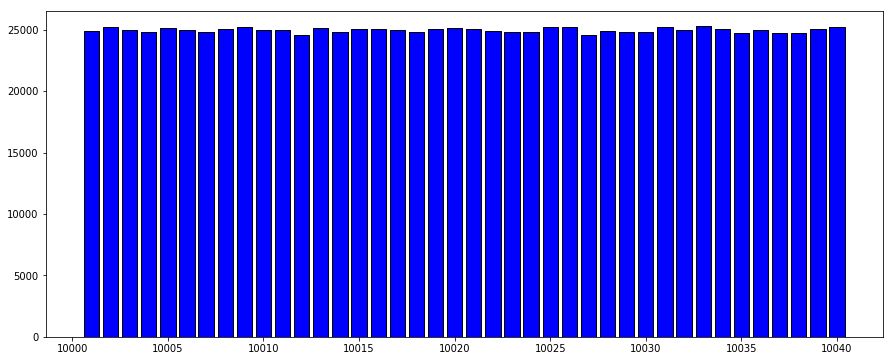

In [5]:
#Query::01
#how many students Departmentwise ?


q4 = spark.sql("select dip.dip_name,dip.dip_code,count(*)as Total_Student_COUNT from spd LEFT join smd on (spd.roll_no = smd.roll_no) LEFT join dip on(spd.dip_code = dip.dip_code) group by dip.dip_code,dip.dip_name ORDER BY dip.dip_code;")
q4.show(50, truncate=False)


print("STUDENTS_DEPARTMENTWISE")
x1 = [i[0] for i in q4.select("dip_code").collect()]

#print(testlist)
y1 = [i[0] for i in q4.select("Total_Student_COUNT").collect()]
#print(FAIL_STUDENT_COUNT)
plt.bar(x1,y1,fc="BLUE",ec="black")
plt.rcParams['figure.figsize']= 15,6


plt.show()











+--------------------------------------------------------------------------+--------+------------------+
|dip_name                                                                  |dip_code|PASS_STUDENT_COUNT|
+--------------------------------------------------------------------------+--------+------------------+
|Aerospace Engineering                                                     |10001   |18350             |
|Biosciences and Bioengineering                                            |10002   |18515             |
|Chemical Engineering                                                      |10003   |18372             |
|Chemistry                                                                 |10004   |18146             |
|Civil Engineering                                                         |10005   |18517             |
|Computer Science & Engineering                                            |10006   |18401             |
|Earth Sciences                                        

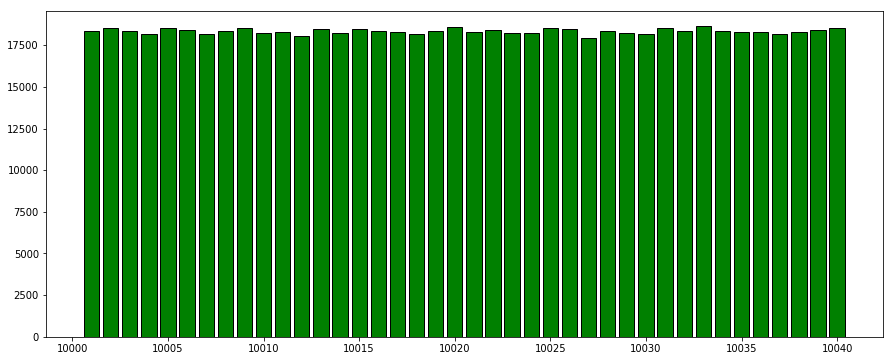

In [52]:
#2.How Many Student only Pass Departmentwise in year 2015 to 2020?

q5 = spark.sql("select dip.dip_name,dip.dip_code,count(*) as PASS_STUDENT_COUNT from spd LEFT join smd on (spd.roll_no = smd.roll_no) LEFT join dip on(spd.dip_code = dip.dip_code) where smd.staus NOT LIKE 'P%' group by dip.dip_code, dip.dip_name ORDER BY dip.dip_code;")
q5.show(50, truncate=False)

print("PASS_STUDENT_DEPARTMENTWISE IN 2015 To 2020")
x2 = [i[0] for i in q5.select("dip_code").collect()]
#print(testlist)
y2 = [i[0] for i in q5.select("PASS_STUDENT_COUNT").collect()]
#print(FAIL_STUDENT_COUNT)
plt.bar(x2,y2,fc="GREEN",ec="black")
plt.rcParams['figure.figsize']= 15,6


plt.show()

+--------------------------------------------------------------------------+--------+------------------+
|dip_name                                                                  |dip_code|FAIL_STUDENT_COUNT|
+--------------------------------------------------------------------------+--------+------------------+
|Aerospace Engineering                                                     |10001   |841               |
|Biosciences and Bioengineering                                            |10002   |852               |
|Chemical Engineering                                                      |10003   |848               |
|Chemistry                                                                 |10004   |826               |
|Civil Engineering                                                         |10005   |862               |
|Computer Science & Engineering                                            |10006   |818               |
|Earth Sciences                                        

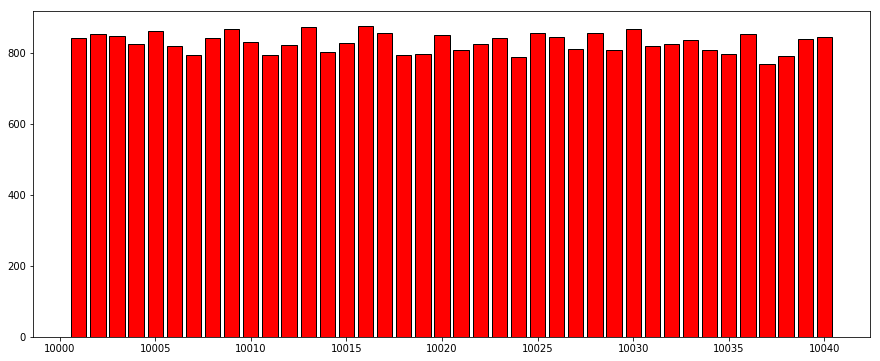

In [6]:

#3.How Many Student FAIL Departmentwise in year 2015? 

from pylab import rcParams

q6 = spark.sql("select dip.dip_name,dip.dip_code,count(*) as FAIL_STUDENT_COUNT from spd LEFT join smd on (spd.roll_no = smd.roll_no) LEFT join dip on(spd.dip_code = dip.dip_code)where (smd.staus LIKE 'F%' and smd.year = 2015 )group by dip.dip_code,dip.dip_name ORDER BY dip.dip_code;")
q6.show(50, truncate=False)


print("FAIL_STUDENT_DEPARTMENTWISE IN 2015")
x = [i[0] for i in q6.select("dip_code").collect()]
#print(testlist)
y = [i[0] for i in q6.select("FAIL_STUDENT_COUNT").collect()]

plt.bar(x,y,fc="RED",ec="black")
plt.rcParams['figure.figsize']= 20,6
plt.show()

